In [13]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

import datetime

from tensorflow import keras
import xgboost as xgb

In [19]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-23'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1

In [15]:
parameters = stes_model.get_parameters(model_type)

In [16]:
train_model = True

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters)

Epoch 1/10
856/856 [==============================] - 2s 2ms/step - loss: 0.0862 - val_loss: 0.0018
Epoch 2/10
856/856 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 7.9612e-04
Epoch 3/10
856/856 [==============================] - 1s 2ms/step - loss: 6.9658e-04 - val_loss: 4.8081e-04
Epoch 4/10
856/856 [==============================] - 1s 2ms/step - loss: 4.3785e-04 - val_loss: 3.3286e-04
Epoch 5/10
856/856 [==============================] - 1s 2ms/step - loss: 3.0634e-04 - val_loss: 2.3148e-04
Epoch 6/10
856/856 [==============================] - 1s 2ms/step - loss: 2.1066e-04 - val_loss: 1.5535e-04
Epoch 7/10
856/856 [==============================] - 1s 2ms/step - loss: 1.3876e-04 - val_loss: 9.8483e-05
Epoch 8/10
856/856 [==============================] - 1s 2ms/step - loss: 8.9552e-05 - val_loss: 6.9015e-05
Epoch 9/10
856/856 [==============================] - 1s 2ms/step - loss: 6.5320e-05 - val_loss: 5.5461e-05
Epoch 10/10
856/856 [===================

In [17]:
save_model_and_addendum = True

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

INFO:tensorflow:Assets written to: ../models/NN_20220708-23/assets


In [20]:
load_model_and_addendum = True

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [22]:
results = validate_model(model, model_type, data_dir, target, scale, addendum)

RMSE: 2.0758647, R2: 0.9981852


In [23]:
val_df = results['val_df']

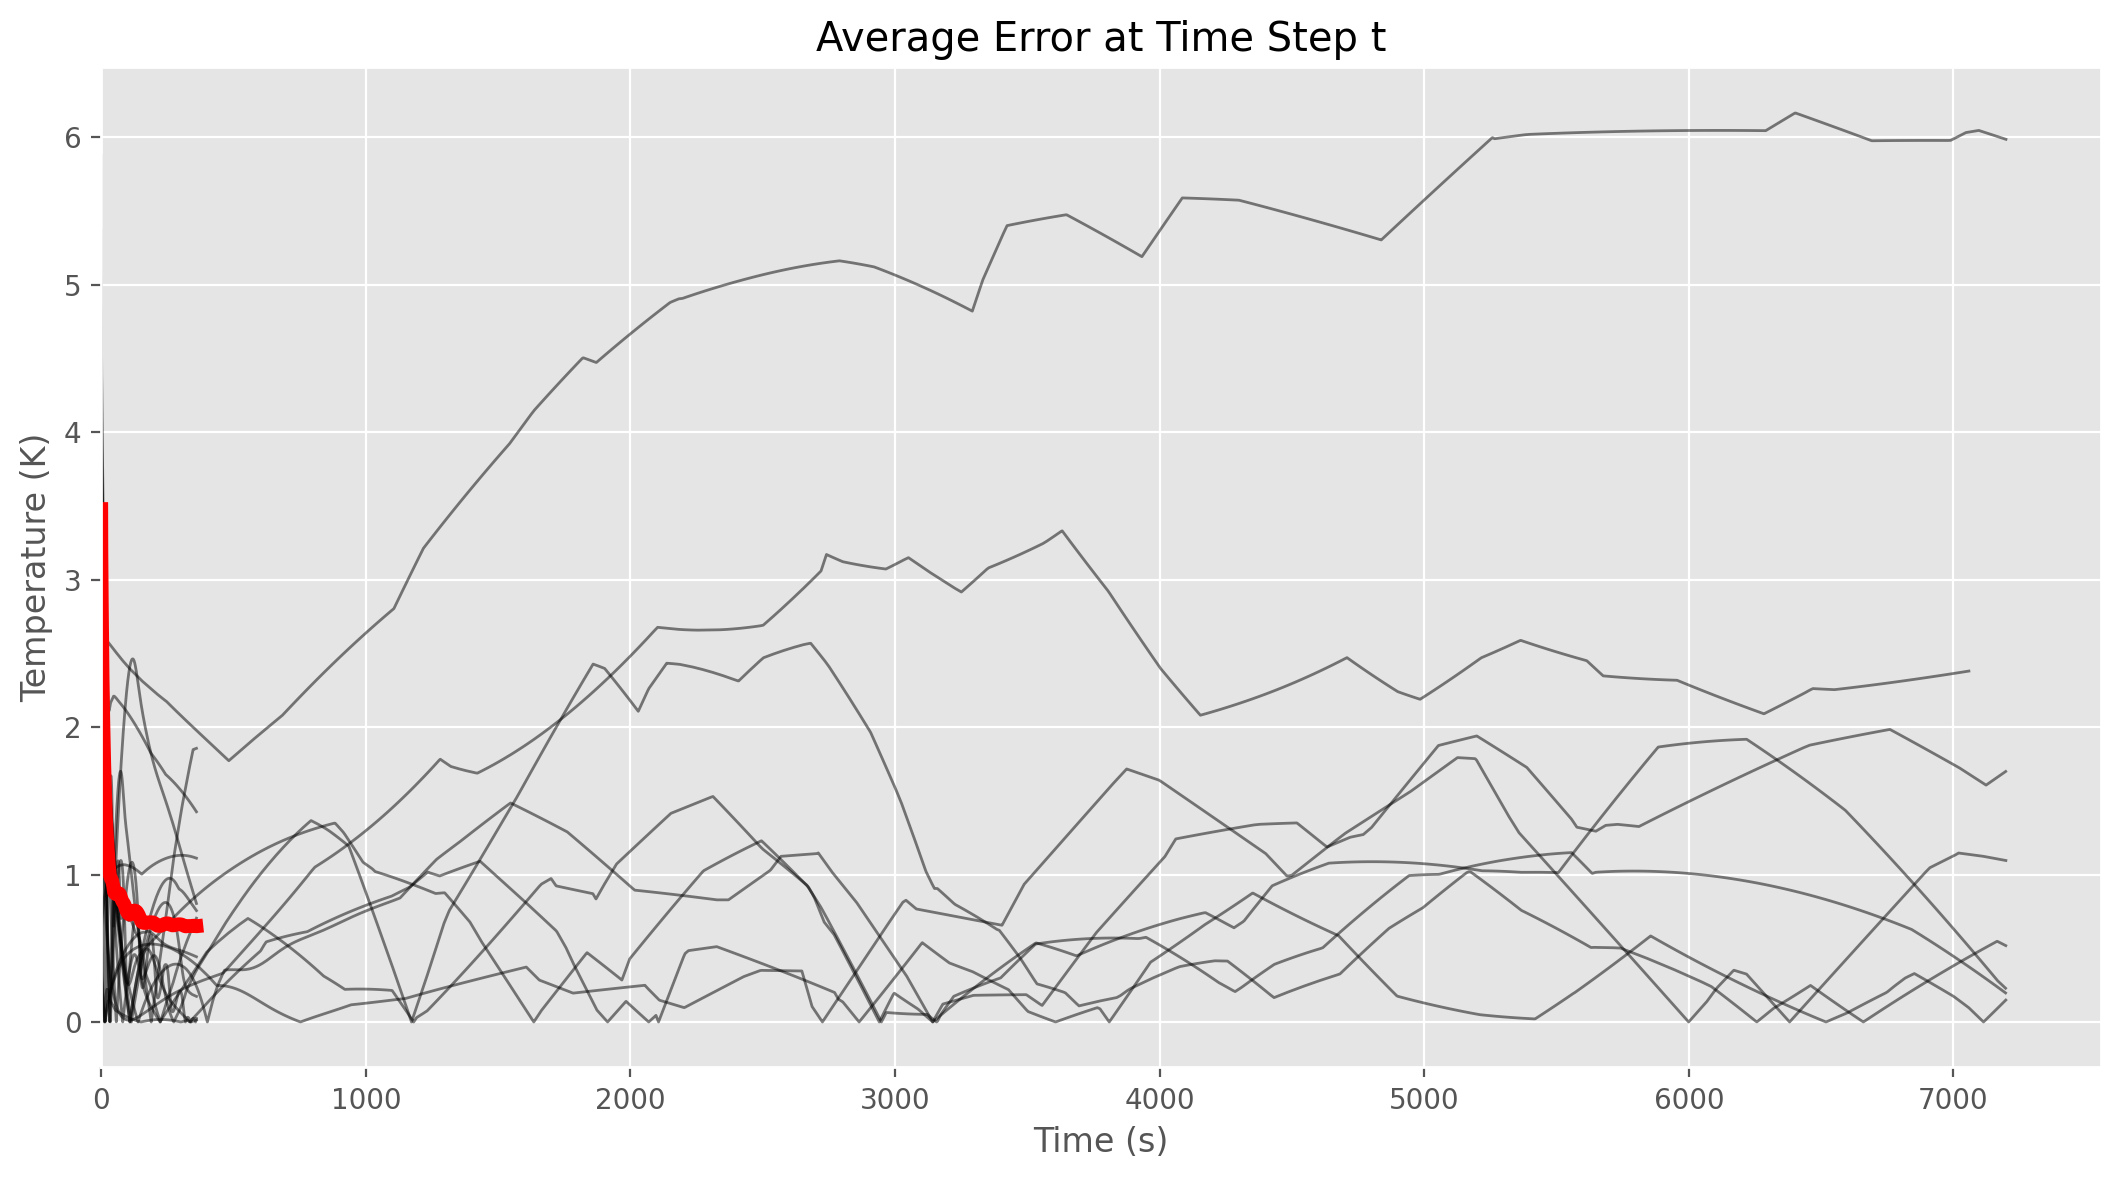

In [24]:
avg_error = plot_average_error(val_df, target=target)

<AxesSubplot:>

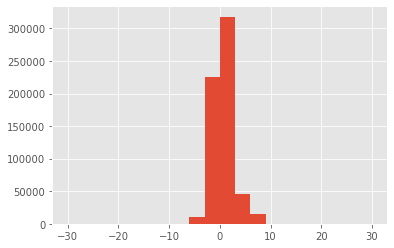

In [25]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

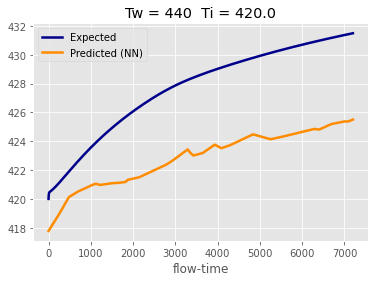

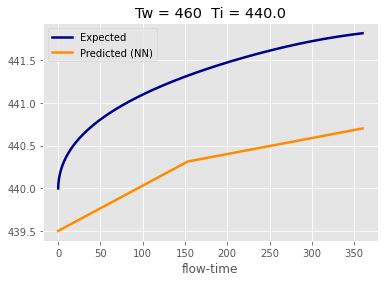

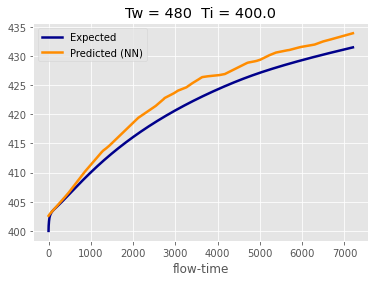

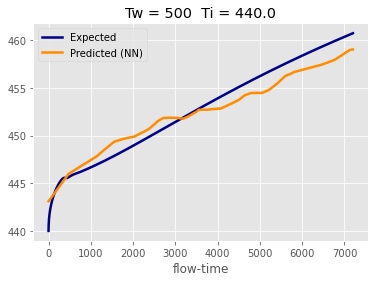

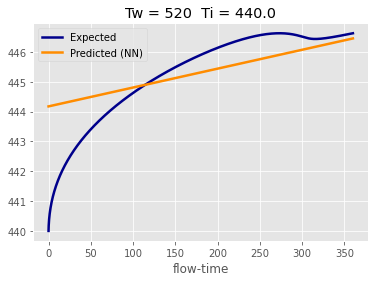

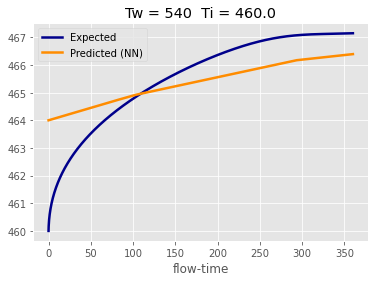

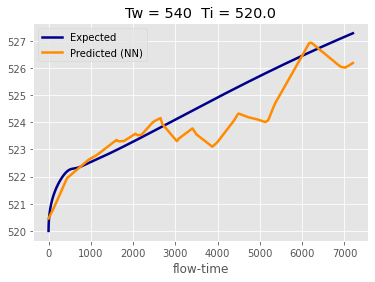

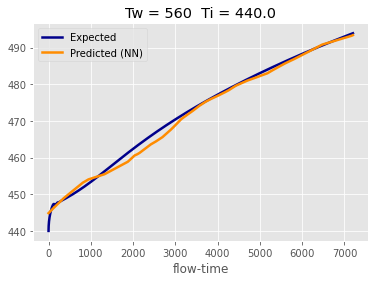

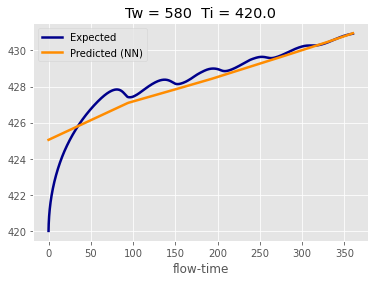

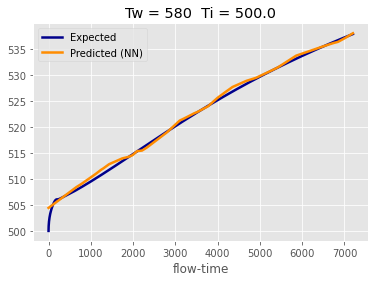

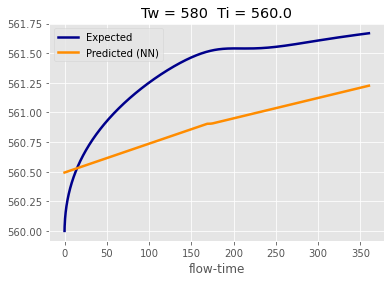

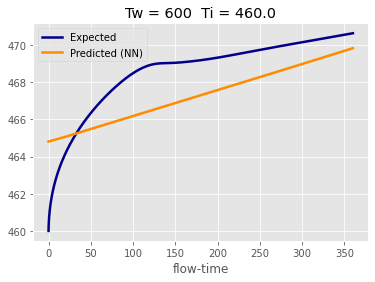

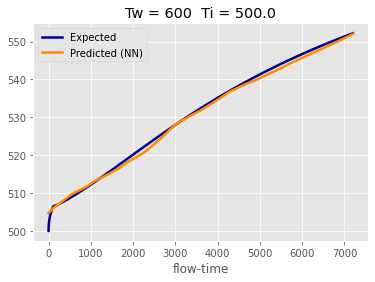

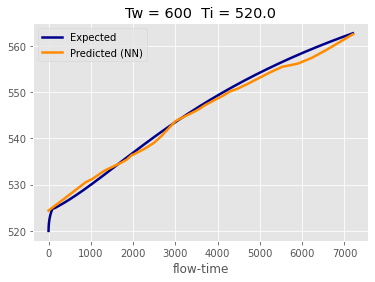

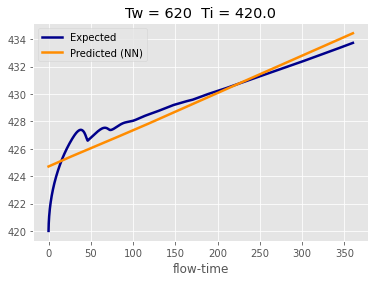

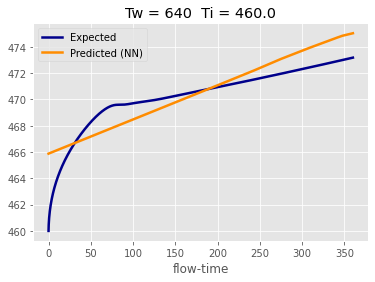

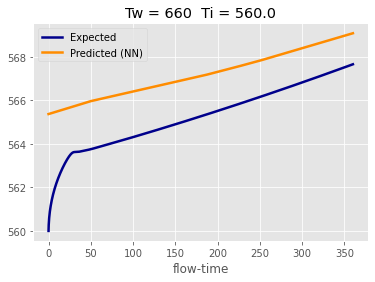

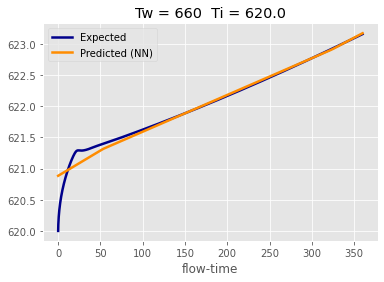

In [26]:
plot_test_results(val_df, model_type, target)

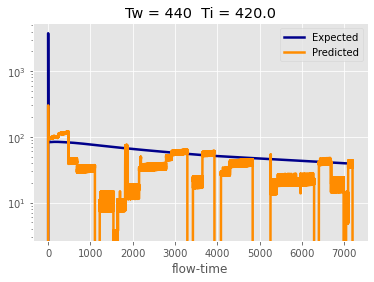

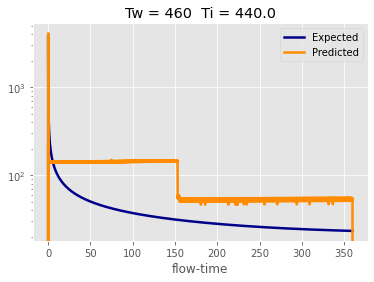

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


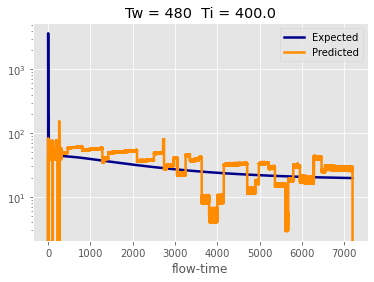

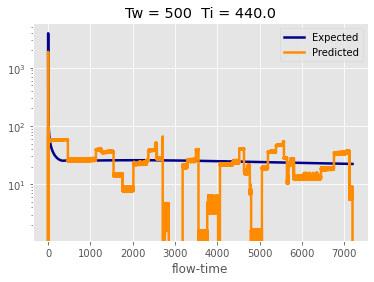

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


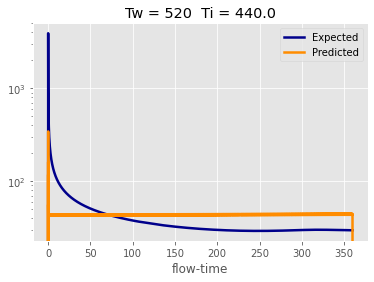

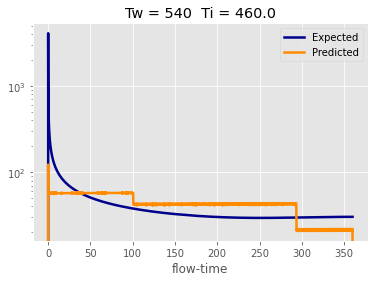

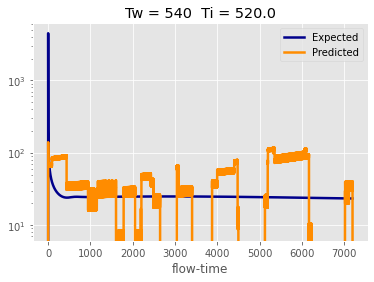

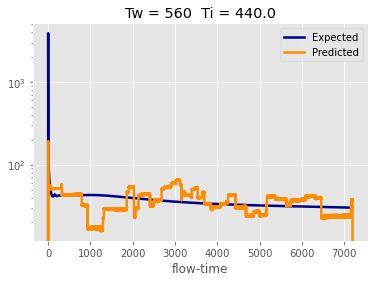

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


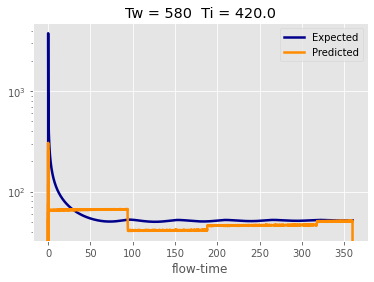

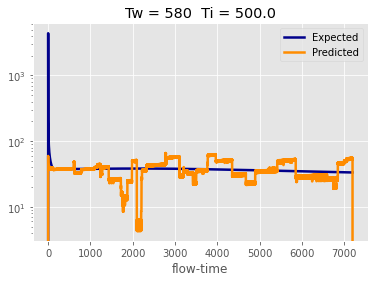

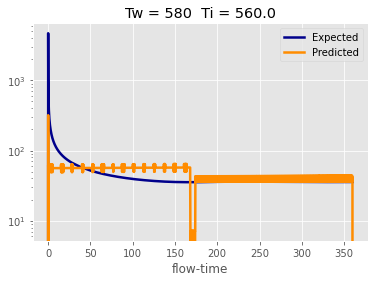

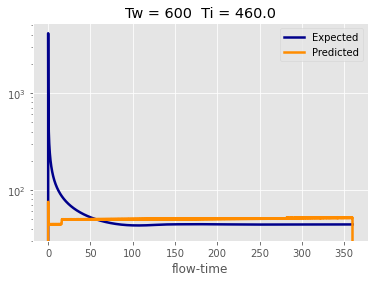

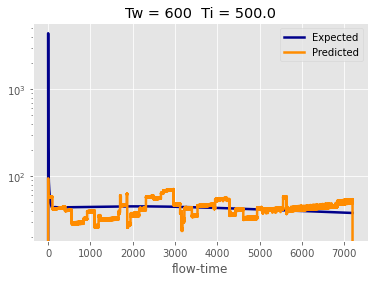

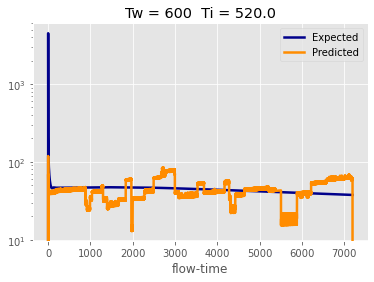

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


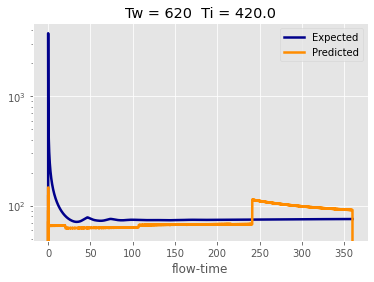

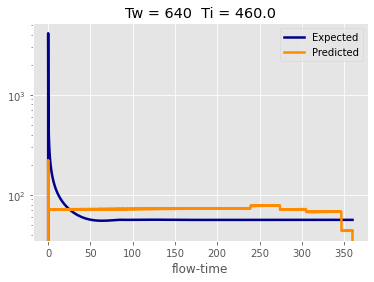

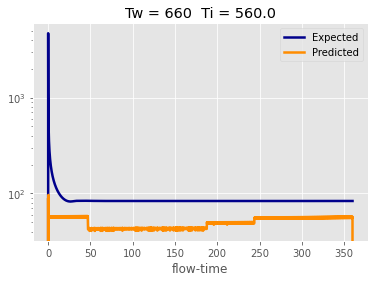

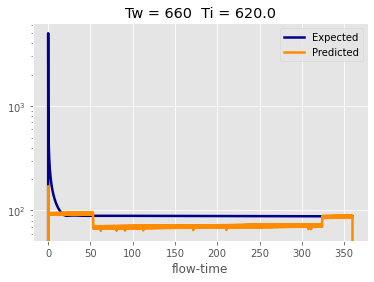

In [27]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(val_df, plot=True)

In [28]:
print(rmse)

83.74452690261293


In [29]:
print(r2)

-0.028326219249059648
